In [1]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore", category=FutureWarning)

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/My Drive/Graduation Project/Graduation Project 1/Analysis/Data_Entry_2017_v2020.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Graduation Project/Graduation Project 1/Analysis/Data_Entry_2017_v2020.csv'

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
df.drop(["OriginalImage[Width","Height]","OriginalImagePixelSpacing[x","y]"],axis = 1 ,inplace=True)

In [ ]:
df.shape

(112120, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     112120 non-null  object
 1   Finding Labels  112120 non-null  object
 2   Follow-up #     112120 non-null  int64 
 3   Patient ID      112120 non-null  int64 
 4   Patient Age     112120 non-null  int64 
 5   Patient Gender  112120 non-null  object
 6   View Position   112120 non-null  object
dtypes: int64(3), object(4)
memory usage: 6.0+ MB


In [ ]:
df.shape

(112120, 7)

In [ ]:
df.isna().sum()

,0
Image Index,0
Finding Labels,0
Follow-up #,0
Patient ID,0
Patient Age,0
Patient Gender,0
View Position,0


In [ ]:
df[df["Finding Labels"] == " "]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Follow-up #,112120.0,8.573751,15.406320,0.0,0.00,3.0,10.0,183.0
Patient ID,112120.0,14346.381743,8403.876972,1.0,7310.75,13993.0,20673.0,30805.0
Patient Age,112120.0,46.626365,16.602680,0.0,34.00,49.0,59.0,95.0


In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA
3,00000002_000.png,No Finding,0,2,80,M,PA
4,00000003_001.png,Hernia,0,3,74,F,PA


In [ ]:
df["View Position"].unique()

array(['PA', 'AP'], dtype=object)

In [ ]:
df["Patient Gender"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
gender_frame = df.groupby("Patient ID")["Patient Gender"].first().to_frame()
gender_frame

,Patient Gender
Patient ID,
1,M
2,M
3,F
4,M
5,F
...,...
30801,M
30802,M
30803,F


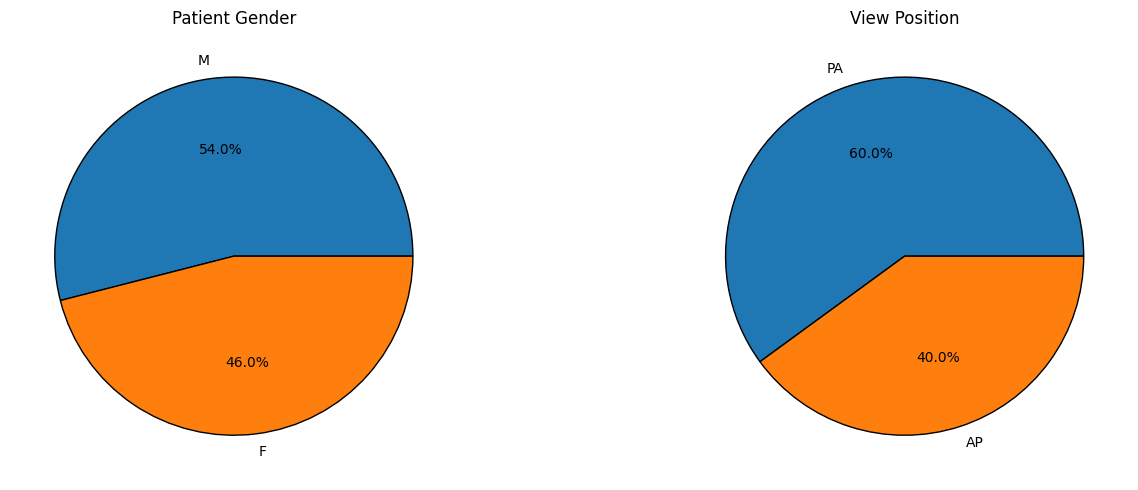

In [ ]:
gender_count = gender_frame["Patient Gender"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(gender_count.values, labels=gender_count.index, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")
ax[0].set_title("Patient Gender")
ax[1].pie(df["View Position"].value_counts().values, labels=df["View Position"].unique(), wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")
ax[1].set_title("View Position")
plt.tight_layout()

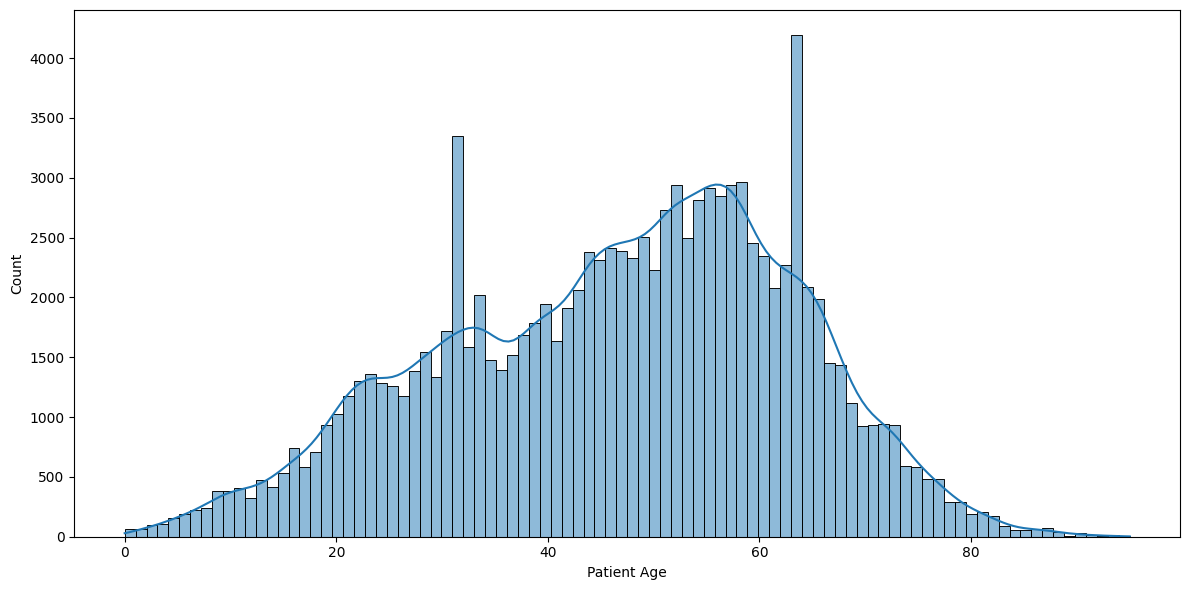

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df["Patient Age"] ,kde = True)
plt.tight_layout()

In [ ]:
df["labels_list"] = df["Finding Labels"].str.split("|")

In [ ]:
df.loc[df["Finding Labels"] != "No Finding" ,"labels_list"].str.len().value_counts().rename_axis("Number of diseases").reset_index()

,Number of diseases,count
0,1,30963
1,2,14306
2,3,4856
3,4,1247
4,5,301
5,6,67
6,7,16
7,9,2
8,8,1


In [ ]:
diseases = []
for i in df["Finding Labels"].str.split("|"):
    for j in i:
      if j not in diseases:
        diseases.append(j)

In [ ]:
diseases

['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'No Finding',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

In [ ]:
dummies = pd.DataFrame(columns=diseases)
df = pd.concat([df ,dummies] ,axis = 1)

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,labels_list,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,[Cardiomegaly],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,"[Cardiomegaly, Emphysema]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,"[Cardiomegaly, Effusion]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000002_000.png,No Finding,0,2,80,M,PA,[No Finding],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000003_001.png,Hernia,0,3,74,F,PA,[Hernia],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in df.iterrows():
    disease = df.loc[i[0] ,("labels_list")]
    for j in disease:
        df.loc[ i[0] ,(f"{j}") ] = 1

In [ ]:
df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,labels_list,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
109966,00029918_002.png,Emphysema,2,29918,76,M,AP,[Emphysema],NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82358,00020261_002.png,No Finding,0,20261,38,F,PA,[No Finding],NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85828,00021182_001.png,Effusion,1,21182,36,M,AP,[Effusion],NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15570,00004082_007.png,No Finding,3,4082,52,F,PA,[No Finding],NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48142,00012193_006.png,Atelectasis,6,12193,55,M,PA,[Atelectasis],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(0 ,inplace = True)

In [ ]:
diseases_count = {}
for disease in diseases:
    diseases_count[disease] = df[disease].sum()

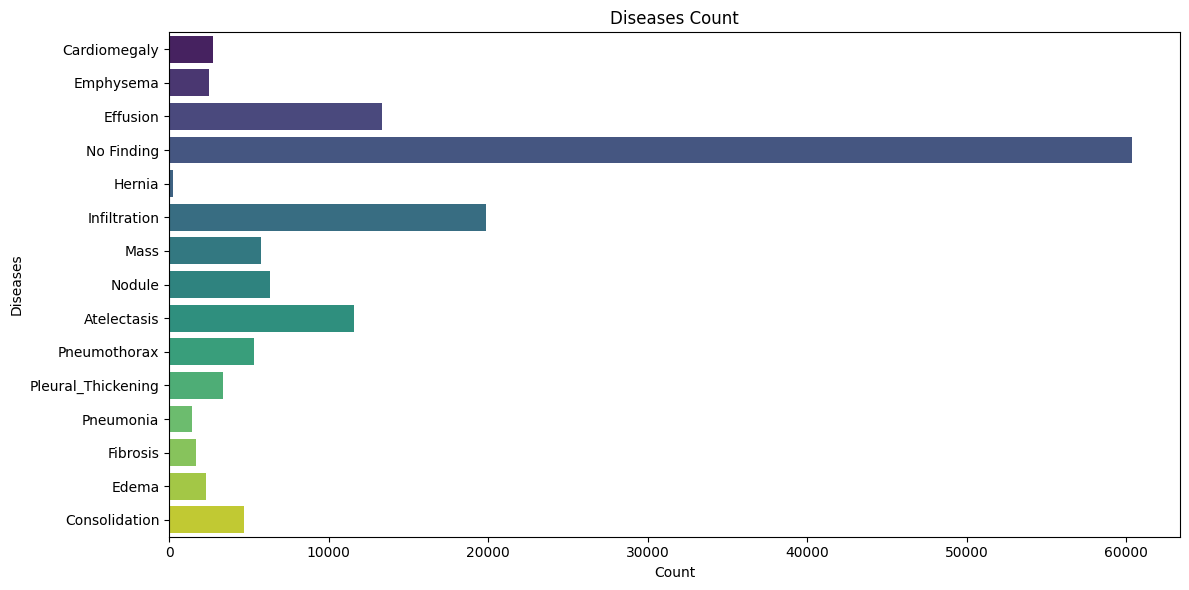

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(diseases_count.values()) ,y=list(diseases_count.keys()) ,palette = "viridis")
plt.title("Diseases Count")
plt.xlabel("Count")
plt.ylabel("Diseases")
plt.tight_layout()

In [ ]:
for disease,count in diseases_count.items():
    print(f"{disease:<{20}}" ,f"{round(round(count / df.shape[0] ,4) * 100 ,3)} %")

Cardiomegaly         2.48 %
Emphysema            2.24 %
Effusion             11.88 %
No Finding           53.84 %
Hernia               0.2 %
Infiltration         17.74 %
Mass                 5.16 %
Nodule               5.65 %
Atelectasis          10.31 %
Pneumothorax         4.73 %
Pleural_Thickening   3.02 %
Pneumonia            1.28 %
Fibrosis             1.5 %
Edema                2.05 %
Consolidation        4.16 %


In [ ]:
# Define a list to combine all the diseases
disease_columns = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
                   'Atelectasis', 'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']

# Group by gender and calculate the sum of occurrences for each disease
grouped_data = df.groupby('Patient Gender')[disease_columns].sum()

In [ ]:
# Sum of occurrences for each disease by gender
males_data = grouped_data.loc['M']
females_data = grouped_data.loc['F']

# Define labels and colors for the pie chart
labels = disease_columns
colors = plt.cm.get_cmap('tab20').colors  # Get a colormap with distinct colors

<ipython-input-35-25e11d12d409>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors  # Get a colormap with distinct colors


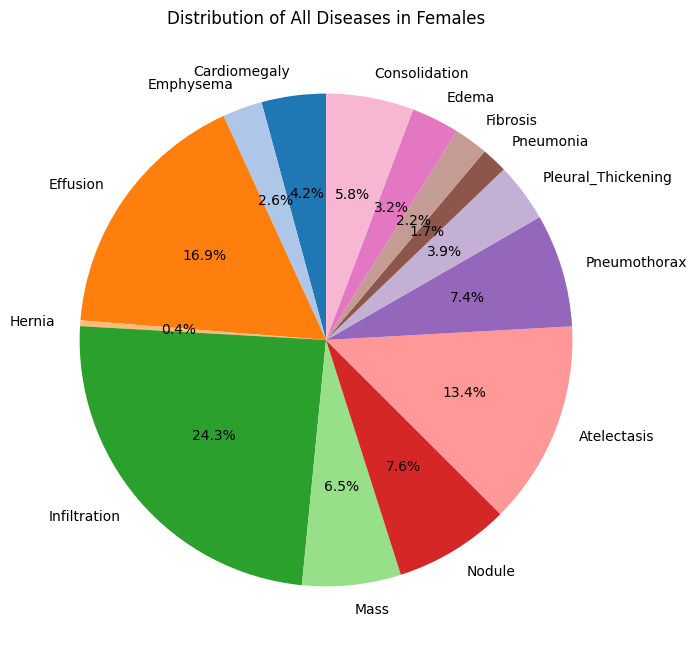

In [ ]:
# Create a pie chart for females
plt.figure(figsize=(8, 8))
plt.pie(females_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of All Diseases in Females')
plt.show()

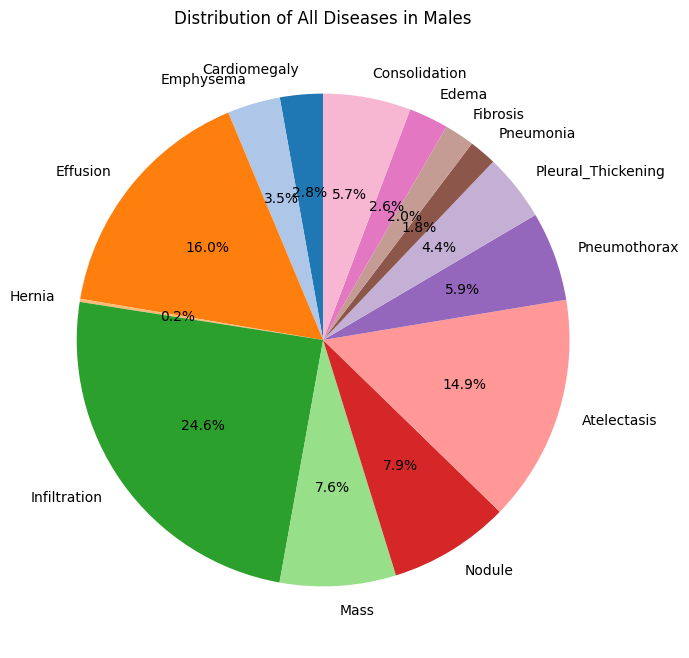

In [ ]:
# Create a pie chart for males
plt.figure(figsize=(8, 8))
plt.pie(males_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of All Diseases in Males')
plt.show()

In [ ]:
# Group the data by 'View Position' and sum the occurrences of each disease for 'PA' and 'AP'
grouped_by_view_position = df.groupby('View Position')[disease_columns].sum()

# Data for PA and AP views
pa_data = grouped_by_view_position.loc['PA']
ap_data = grouped_by_view_position.loc['AP']

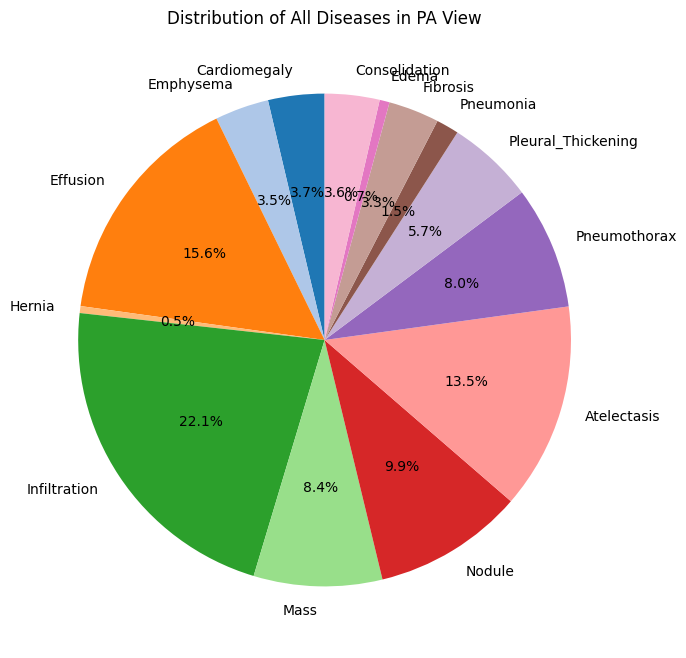

In [ ]:
# Create a pie chart for PA view
plt.figure(figsize=(8, 8))
plt.pie(pa_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of All Diseases in PA View')
plt.show()

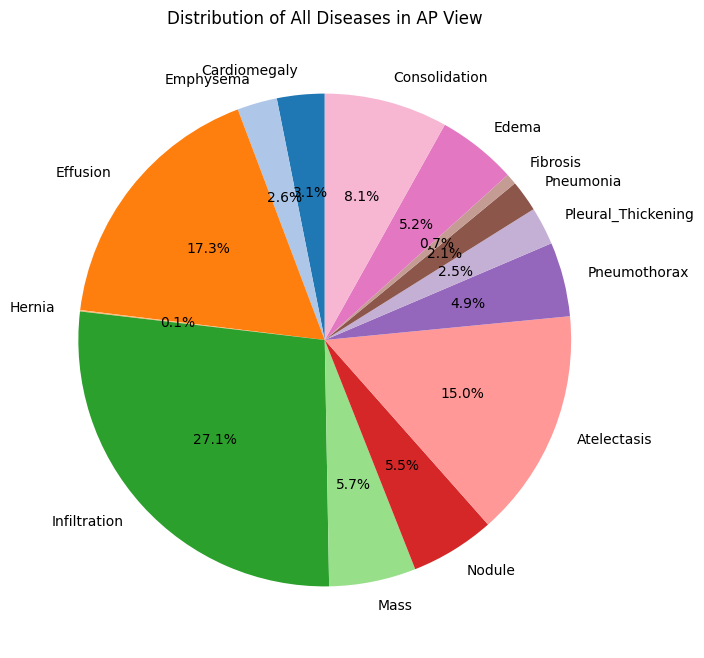

In [ ]:
# Create a pie chart for AP view
plt.figure(figsize=(8, 8))
plt.pie(ap_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of All Diseases in AP View')
plt.show()

In [ ]:
# Define bins for age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']

In [ ]:
# Create a new column for Age Group
df['Age Group'] = pd.cut(df['Patient Age'], bins=bins, labels=labels, right=False)

# Group the data by 'Age Group' and sum the occurrences of each disease
age_group_disease_distribution = df.groupby('Age Group')[disease_columns].sum()

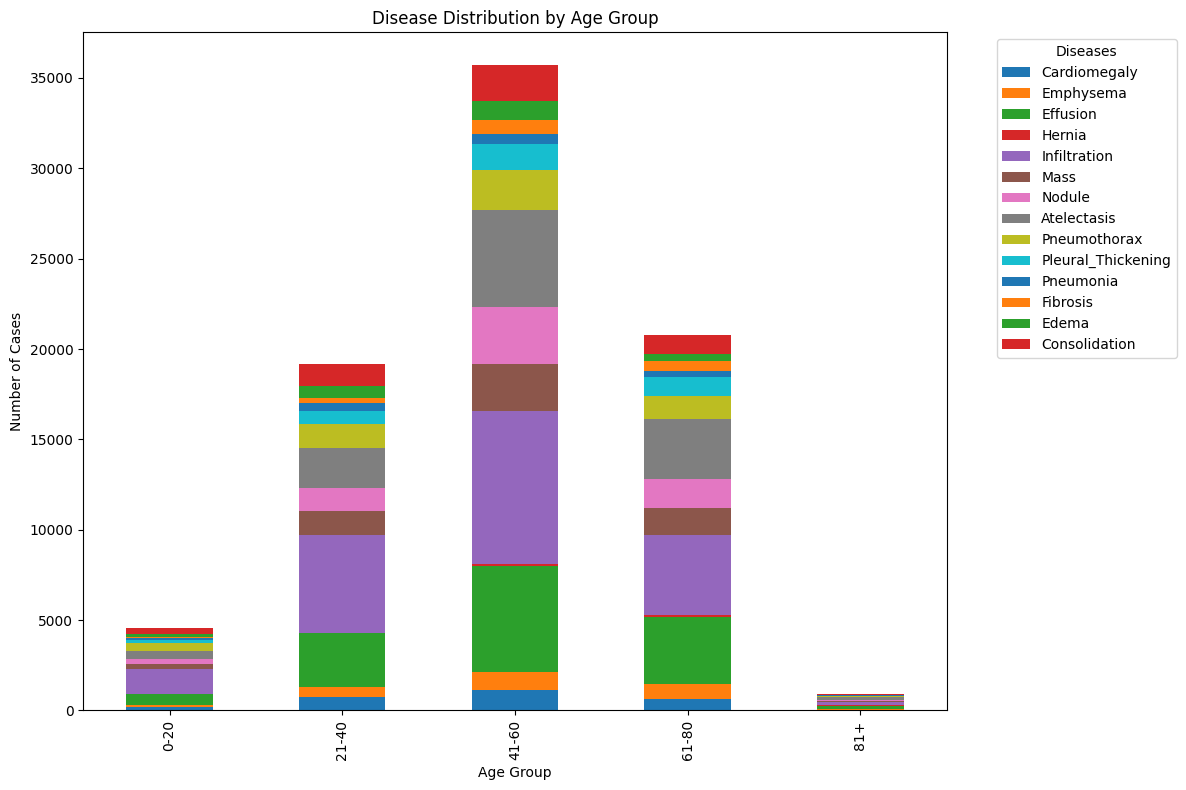

In [ ]:
# Plot each disease's distribution across age groups in a stacked bar plot
age_group_disease_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Diseases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import ast

# Convert each string representation of a list back into a proper list format (if needed)
df['labels_list'] = df['labels_list'].apply(lambda x: ast.literal_eval(str(x)))

# Filter for rows with multiple diseases (lists with more than one element)
multi_disease_rows = df[df['labels_list'].apply(len) > 1]

# Clean up the disease names (removing extra spaces) and convert lists to tuples
multi_disease_rows['cleaned_labels_list'] = multi_disease_rows['labels_list'].apply(lambda x: tuple(disease.strip() for disease in x))

# Count the occurrences of each unique combination of diseases
cleaned_disease_combination_counts = multi_disease_rows['cleaned_labels_list'].value_counts()

# Display the top 10 most common combinations
top_combinations = cleaned_disease_combination_counts.head(10)
print(top_combinations)


cleaned_labels_list
(Effusion, Infiltration)                 1603
(Atelectasis, Infiltration)              1350
(Atelectasis, Effusion)                  1165
(Infiltration, Nodule)                    829
(Atelectasis, Effusion, Infiltration)     737
(Cardiomegaly, Effusion)                  484
(Consolidation, Infiltration)             441
(Infiltration, Mass)                      420
(Effusion, Pneumothorax)                  403
(Effusion, Mass)                          402
Name: count, dtype: int64


<ipython-input-44-2b41ed0897b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_disease_rows['cleaned_labels_list'] = multi_disease_rows['labels_list'].apply(lambda x: tuple(disease.strip() for disease in x))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Image Index         112120 non-null  object  
 1   Finding Labels      112120 non-null  object  
 2   Follow-up #         112120 non-null  int64   
 3   Patient ID          112120 non-null  int64   
 4   Patient Age         112120 non-null  int64   
 5   Patient Gender      112120 non-null  object  
 6   View Position       112120 non-null  object  
 7   labels_list         112120 non-null  object  
 8   Cardiomegaly        112120 non-null  int64   
 9   Emphysema           112120 non-null  int64   
 10  Effusion            112120 non-null  int64   
 11  No Finding          112120 non-null  int64   
 12  Hernia              112120 non-null  int64   
 13  Infiltration        112120 non-null  int64   
 14  Mass                112120 non-null  int64   
 15  Nodule           

<Figure size 2000x1500 with 0 Axes>

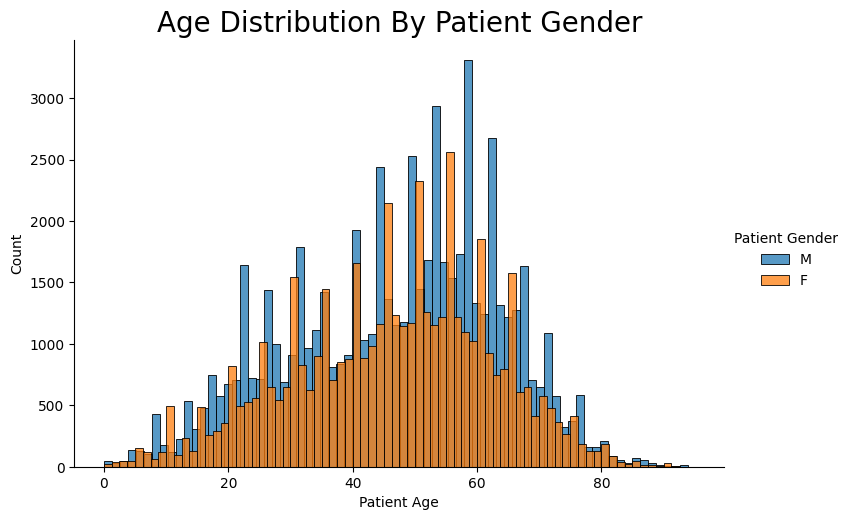

In [ ]:
# Age distribution
plt.figure(figsize=(20,15))
sns.FacetGrid(df, hue='Patient Gender', height=5, aspect=1.5).map(sns.histplot, 'Patient Age').add_legend()
plt.title('Age Distribution By Patient Gender', fontsize=20)
plt.show()

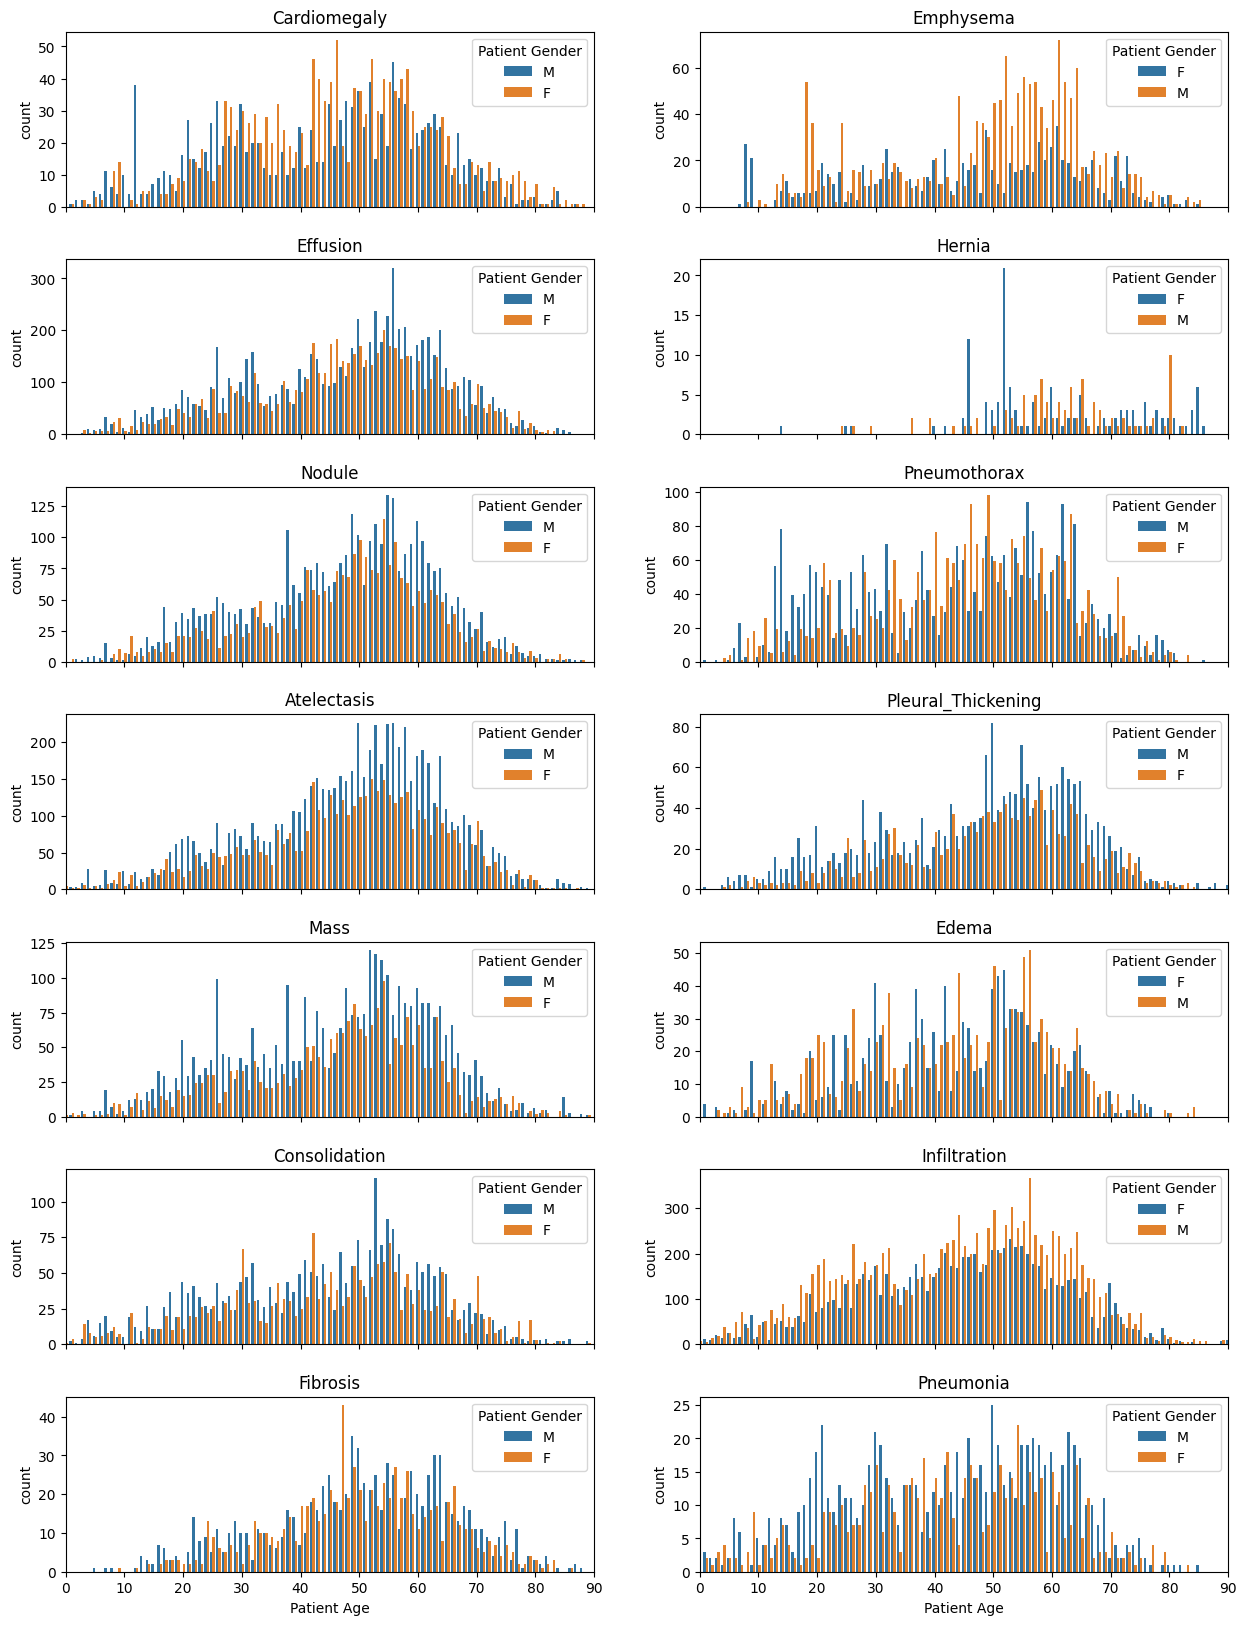

In [ ]:
# Disease distribution by age and gender

f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
data = df[df['Finding Labels'] != 'No Finding']
i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    index = []
    for k in range(len(data)):
        if pathology in data.iloc[k]['Finding Labels']:
            index.append(k)
    # Convert 'Patient Age' to numeric before plotting, handling errors
    subset_data = data.iloc[index].copy()  # Create a copy to avoid SettingWithCopyWarning
    subset_data['Patient Age'] = subset_data['Patient Age'].astype(int, errors='ignore')

    g=sns.countplot(x='Patient Age', hue="Patient Gender", data=subset_data, ax=axarr[i, j]) # Pass subset_data here
    axarr[i, j].set_title(pathology)
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

In [ ]:
#No. of each disease by patient gender

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

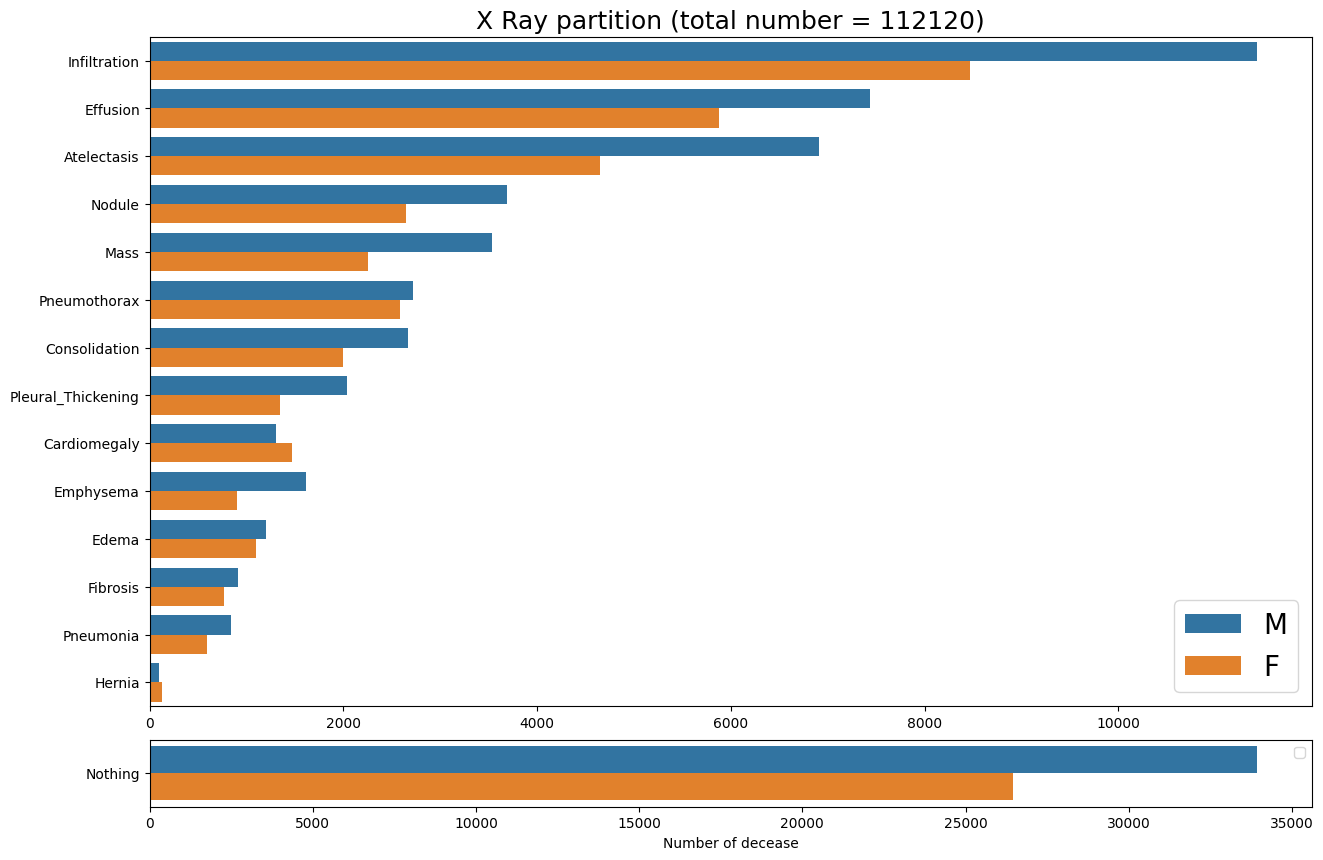

In [ ]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
# The 'data' argument should be data1, and 'y' should be 'Category'
g=sns.countplot(y='Category', hue='Patient Gender', data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 112120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [ ]:
#ratio between one and multiple disease:

data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

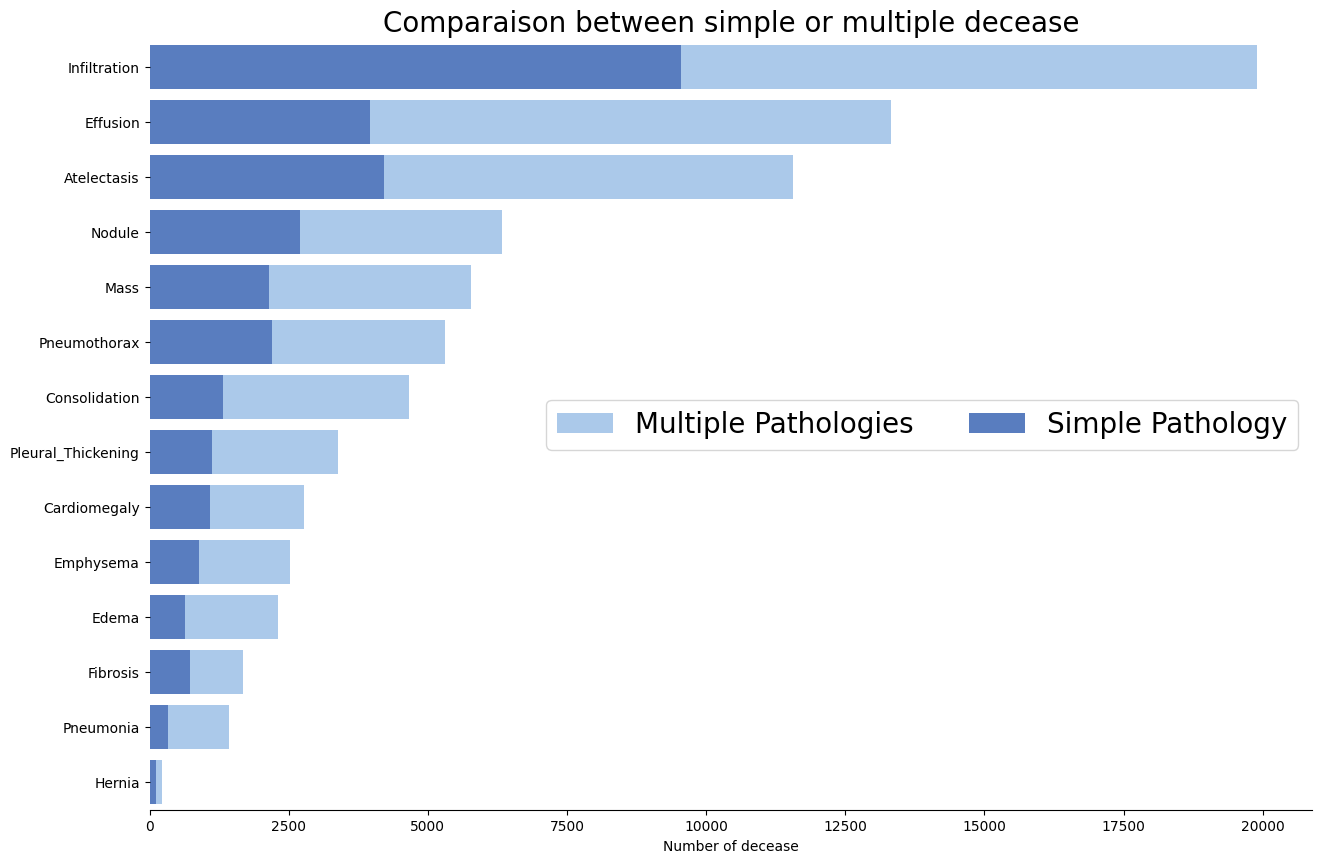

In [ ]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
# Pass data1 to the 'data' argument
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
# Use df2 directly for barplot, specifying x and y columns
g=sns.barplot(x='Patient ID',y='Finding Labels', data=df2, ax=ax, color="b",label="Simple Pathology") # Changed df=df2 to data=df2
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)
sns.despine(left=True)

In [ ]:
df['Gender'] = df['Patient Gender'].apply(lambda x: 1 if x == 'F' else 0)

In [ ]:
followupdata=df[['Patient ID', 'Finding Labels', 'Follow-up #']]
follow_up_summary = followupdata.groupby(['Patient ID', 'Follow-up #'])['Finding Labels'].agg(lambda x: ', '.join(set(x))).reset_index()
print(follow_up_summary)

        Patient ID  Follow-up #          Finding Labels
0                1            0            Cardiomegaly
1                1            1  Cardiomegaly|Emphysema
2                1            2   Cardiomegaly|Effusion
3                2            0              No Finding
4                3            0                  Hernia
...            ...          ...                     ...
112115       30801            1          Mass|Pneumonia
112116       30802            0              No Finding
112117       30803            0              No Finding
112118       30804            0              No Finding
112119       30805            0              No Finding

[112120 rows x 3 columns]


In [ ]:
trend_data = follow_up_summary[follow_up_summary['Finding Labels'].str.contains('Pneumonia')]

In [ ]:
trend_count = trend_data.groupby('Follow-up #')['Finding Labels'].count().reset_index()
trend_count.columns = ['Follow-up #', 'Count of Pneumonia']


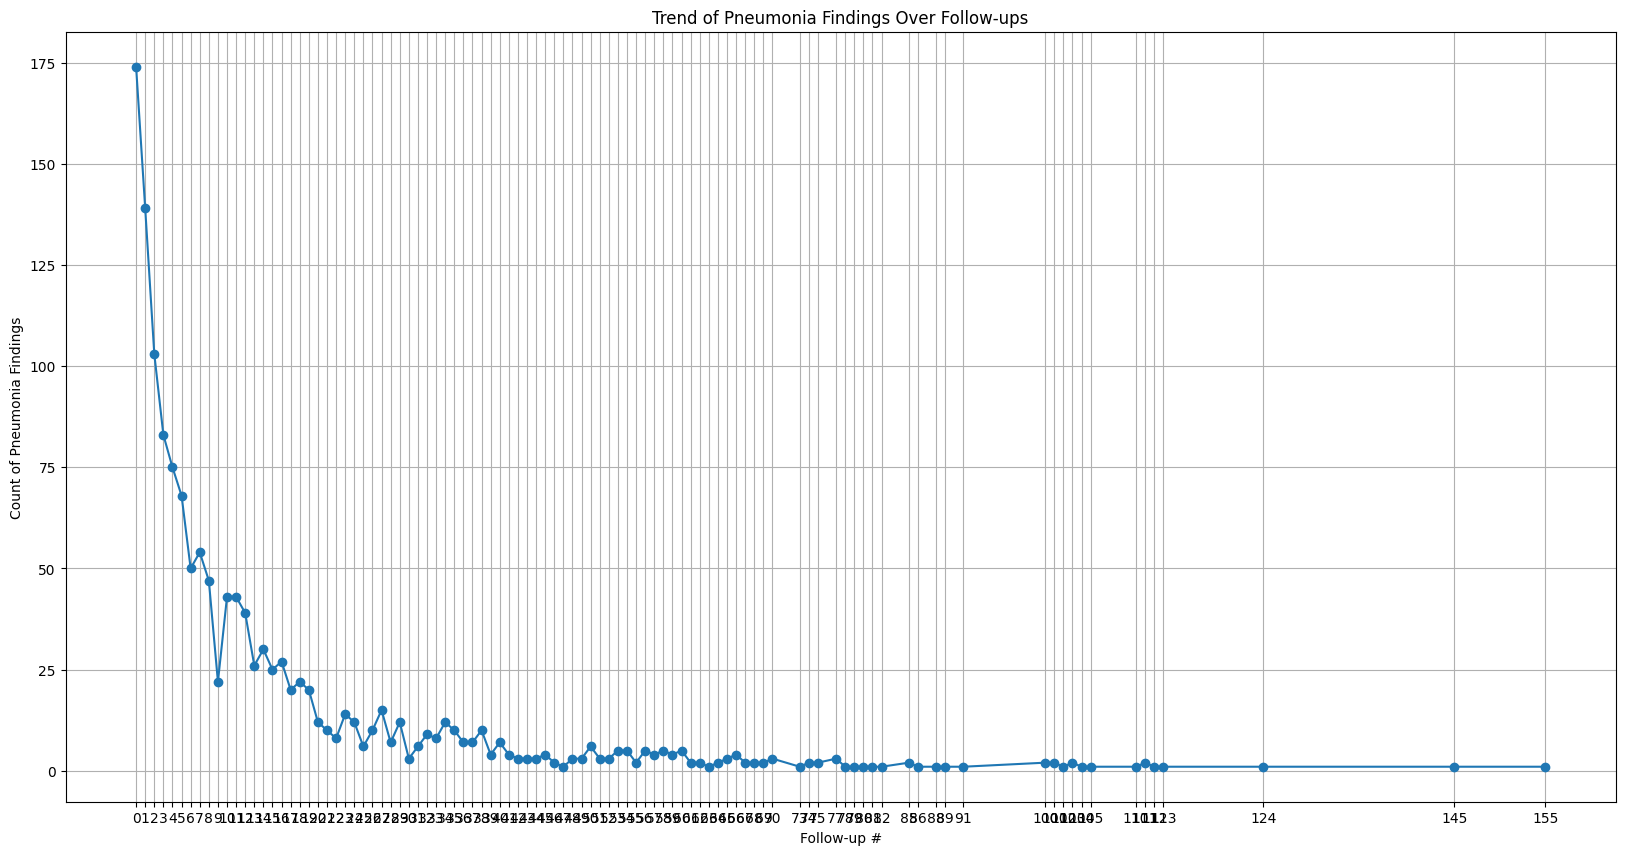

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(trend_count['Follow-up #'], trend_count['Count of Pneumonia'], marker='o')
plt.title('Trend of Pneumonia Findings Over Follow-ups')
plt.xlabel('Follow-up #')
plt.ylabel('Count of Pneumonia Findings')
plt.xticks(trend_count['Follow-up #'])
plt.grid()
plt.show()

In [ ]:
from scipy import stats


df['z_score'] = stats.zscore(df['Follow-up #'])
outliers_z = df[df['z_score'].abs() > 3]
num_outliers_z = len(outliers_z)


Q1 = df['Follow-up #'].quantile(0.25)
Q3 = df['Follow-up #'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Follow-up #'] < lower_bound) | (df['Follow-up #'] > upper_bound)]
num_outliers_iqr = len(outliers_iqr)


print("Number of outliers using Z-Score Method:", num_outliers_z)
print("Number of outliers using IQR Method:", num_outliers_iqr)
print("\nOutliers detected using Z-Score Method:\n", outliers_z)
print("\nOutliers detected using IQR Method:\n", outliers_iqr)

Number of outliers using Z-Score Method: 2589
Number of outliers using IQR Method: 10182

Outliers detected using Z-Score Method:
              Image Index                Finding Labels  Follow-up #  \
169     00000032_055.png                  Cardiomegaly           55   
170     00000032_056.png                  Cardiomegaly           56   
171     00000032_058.png   Edema|Effusion|Infiltration           57   
172     00000032_057.png   Edema|Effusion|Infiltration           58   
173     00000032_059.png     Cardiomegaly|Infiltration           59   
...                  ...                           ...          ...   
110478  00030079_070.png  Effusion|Infiltration|Nodule           70   
110479  00030079_071.png                    No Finding           71   
110480  00030079_072.png                    No Finding           72   
110481  00030079_073.png                    No Finding           73   
111128  00030323_055.png                    No Finding           55   

        Patient 

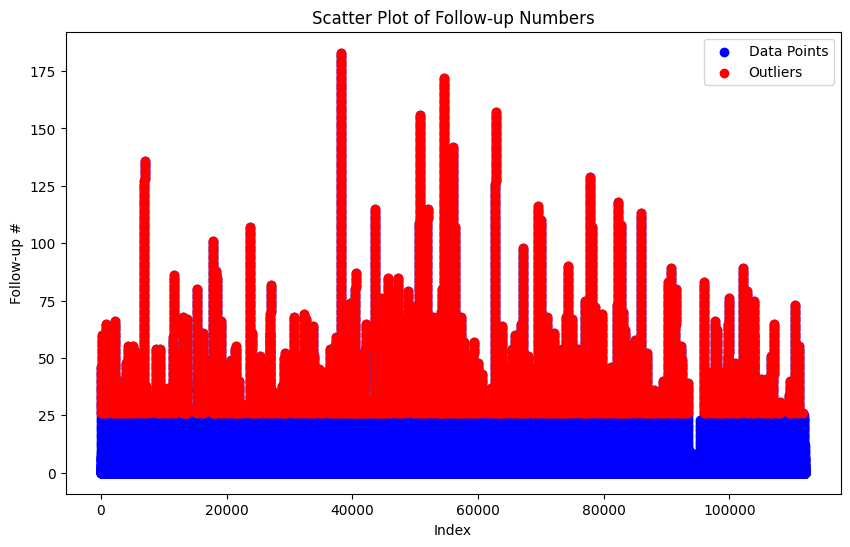

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Follow-up #'], color='blue', label='Data Points')
plt.title('Scatter Plot of Follow-up Numbers')
plt.xlabel('Index')
plt.ylabel('Follow-up #')

outliers_iqr = df[(df['Follow-up #'] < lower_bound) | (df['Follow-up #'] > upper_bound)]
plt.scatter(outliers_iqr.index, outliers_iqr['Follow-up #'], color='red', label='Outliers')

plt.legend()
plt.show()

In [ ]:
df.shape

(112120, 27)

In [ ]:
Q1_follow_up = df['Follow-up #'].quantile(0.25)
Q3_follow_up = df['Follow-up #'].quantile(0.75)
IQR_follow_up = Q3_follow_up - Q1_follow_up

# Define bounds for outliers
lower_bound_follow_up = Q1_follow_up - 1.5 * IQR_follow_up
upper_bound_follow_up = Q3_follow_up + 1.5 * IQR_follow_up

# Filter outliers in the 'Follow-up #' column
df_filtered = df[(df['Follow-up #'] >= lower_bound_follow_up) & (df['Follow-up #'] <= upper_bound_follow_up)]

# Display the number of outliers removed
outliers_removed = df.shape[0] - df_filtered.shape[0]
print(f"Number of outliers removed from 'Follow-up #': {outliers_removed}")

# Update df to the filtered DataFrame
df = df_filtered


Number of outliers removed from 'Follow-up #': 10182


In [ ]:
df.shape

(101938, 27)

In [ ]:
# Open and load the photos file
with open("/content/drive/My Drive/Project/Analysis/data.pkl", 'rb') as img_file:
    images = pickle.load(img_file)

# Open and Load the label file
with open("/content/drive/My Drive/Project/Analysis/labels.pkl", 'rb') as label_file:
    labels = pickle.load(label_file)

# Check the types of both data objects
print(f"Type of images: {type(images)}")
print(f"Type of labels: {type(labels)}")


Type of images: <class 'numpy.ndarray'>
Type of labels: <class 'numpy.ndarray'>


NameError: name 'first_label' is not defined

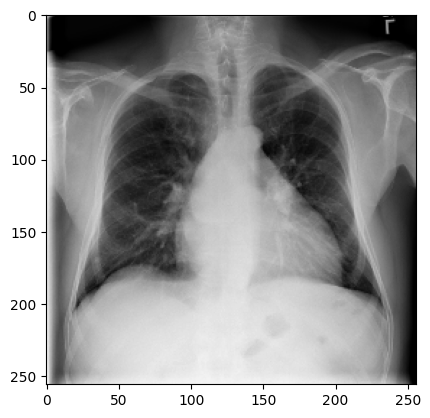

In [ ]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[0], cmap='gray')

# Convert the ndarray to a string for the title
title_label = str(first_label.item()) if first_label.size == 1 else str(first_label)

plt.title(f'first image, Label: {title_label}')
plt.axis('off')
plt.show()

In [ ]:
#Checking the highest follow up number we have in our dataset:
highest_followup = df['Follow-up #'].max()

print('the highest follow up number is:', highest_followup)
print('-------------------------------------------------------')

#Checking the patient who has the highest follow up number:
highest_followup_records = df[df['Follow-up #'] == highest_followup]

print('the patient who has the highest follow up number is:')
print()
highest_followup_records

the highest follow up number is: 183
-------------------------------------------------------
the patient who has the highest follow up number is:



,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,labels_list,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Age Group,Nothing,Gender
38264,00010007_183.png,Effusion|Infiltration,183,10007,58,M,AP,"[Effusion, Infiltration]",0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,41-60,0,0


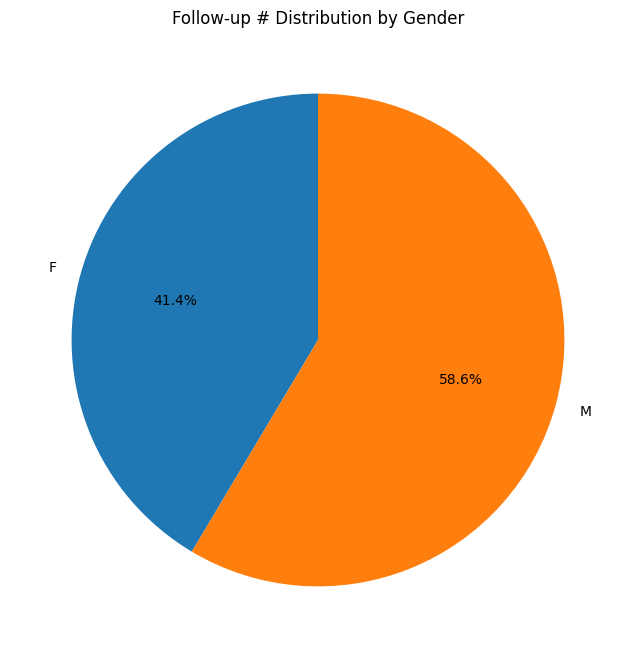

In [ ]:
# follow-up # distribution by gender
gender_followup_counts = df.groupby('Patient Gender')['Follow-up #'].sum()
gender_followup_counts = gender_followup_counts / gender_followup_counts.sum() * 100  # Convert to percentage

# Plot pie chart
fig, axs = plt.subplots(1, 1, figsize=(8, 8))  # Adjusted to a single subplot since only one chart is created

# Pie chart for Follow-up # by Gender
axs.pie(gender_followup_counts, labels=gender_followup_counts.index, autopct='%1.1f%%', startangle=90)
axs.set_title("Follow-up # Distribution by Gender")

plt.show()

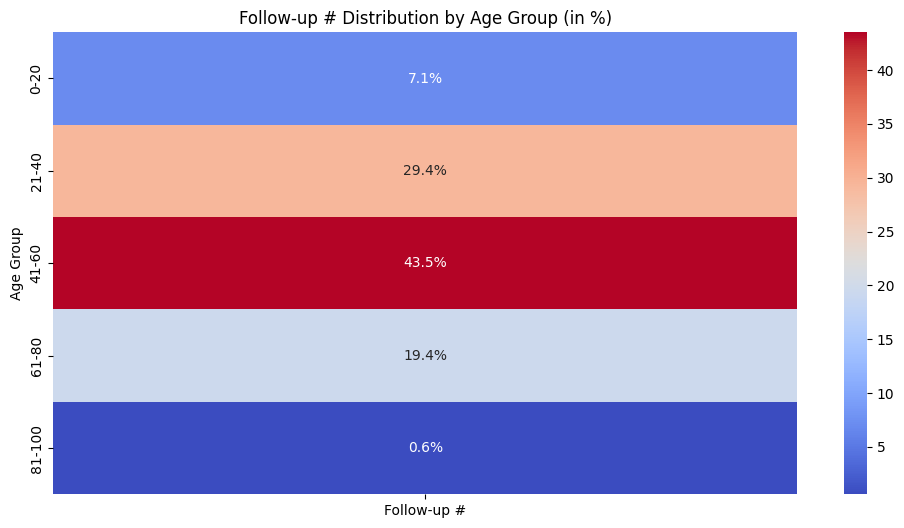

In [ ]:
# follow-up # distribution by age groups
age_bins = [0, 20, 40, 60, 80, 100]
df['Age Group'] = pd.cut(df['Patient Age'], bins=age_bins, labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
age_followup_counts = df.groupby('Age Group')['Follow-up #'].sum()
age_followup_counts = age_followup_counts / age_followup_counts.sum() * 100

# Example using different color maps
cmap_choice = "coolwarm"

# Plot heatmap for Follow-up # by Gender
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Format values to include % sign by converting them to strings
formatted_counts = age_followup_counts.apply(lambda x: f"{x:.1f}%").to_frame()

# Plot heatmap and display as percentage with custom color map
sns.heatmap(age_followup_counts.to_frame(), annot=formatted_counts, fmt="", cmap=cmap_choice, ax=axs)
axs.set_title("Follow-up # Distribution by Age Group (in %)")

plt.show()

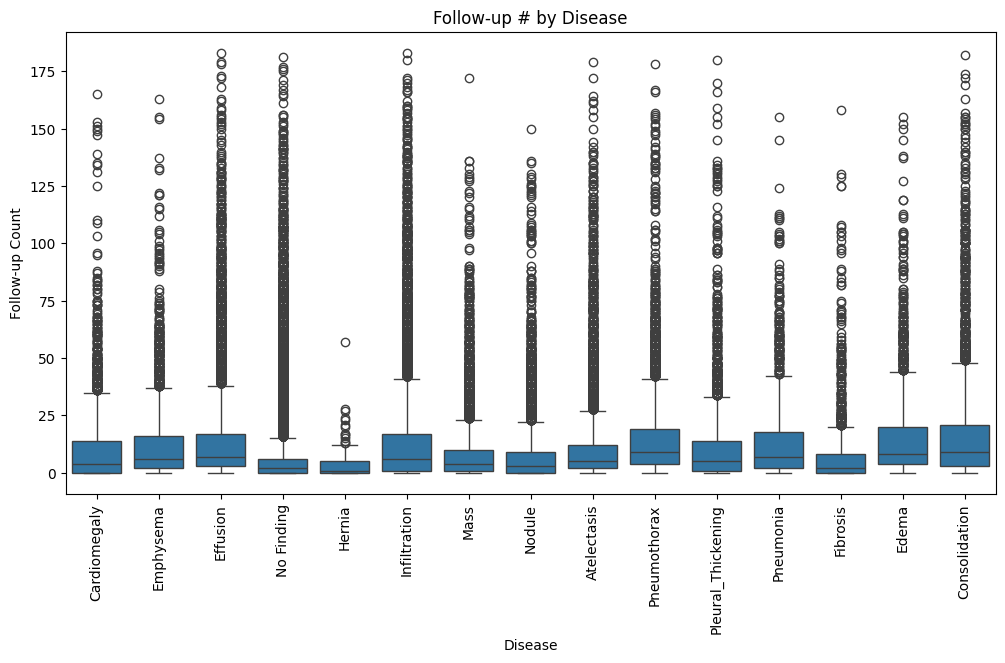

In [ ]:
# Extract unique diseases from the "Finding Labels" column, as some records have multiple labels separated by "|"
disease_data = df.assign(**{'Finding Labels': df['Finding Labels'].str.split('|')}).explode('Finding Labels')

# Analyze follow-up counts by specific diseases
plt.figure(figsize=(12, 6))
sns.boxplot(data=disease_data, x='Finding Labels', y='Follow-up #')
plt.xticks(rotation=90)
plt.title("Follow-up # by Disease")
plt.xlabel("Disease")
plt.ylabel("Follow-up Count")
plt.show()

In [ ]:
#PA (Posteroanterior): This view position is predominantly used across all follow-up numbers, especially during the initial scans (Follow-up # 0) and early follow-up stages.
#AP (Anteroposterior): This view is used less frequently overall, though it still appears consistently across different follow-up numbers.

#PA View Dominance: PA (posteroanterior) views are generally preferred in early follow-ups. This preference aligns with standard clinical practice, where PA views are commonly used as they provide a more accurate depiction of the heart size and lung structures compared to AP (anteroposterior) views. PA views are also typically used when the patient can stand, allowing the lungs to expand fully.
#AP View Usage: Although AP views are less common in early stages, they are still present. AP views are usually employed when patients are unable to stand or move to a standing position, such as in emergency or ICU settings.

# Generate a summary of the relationship between Follow-up # and View Position
follow_up_view_position_summary = df.groupby(['Follow-up #', 'View Position']).size().unstack()

# Display the summary to understand the distribution
follow_up_view_position_summary.fillna(0, inplace=True)  # Replace NaN with 0 for better readability
follow_up_view_position_summary

View Position,AP,PA
Follow-up #,,
0,3640.0,27165.0
1,4911.0,8391.0
2,3941.0,5248.0
3,3136.0,3953.0
4,2644.0,3115.0
...,...,...
179,1.0,0.0
180,1.0,0.0
181,1.0,0.0


<Figure size 1200x600 with 0 Axes>

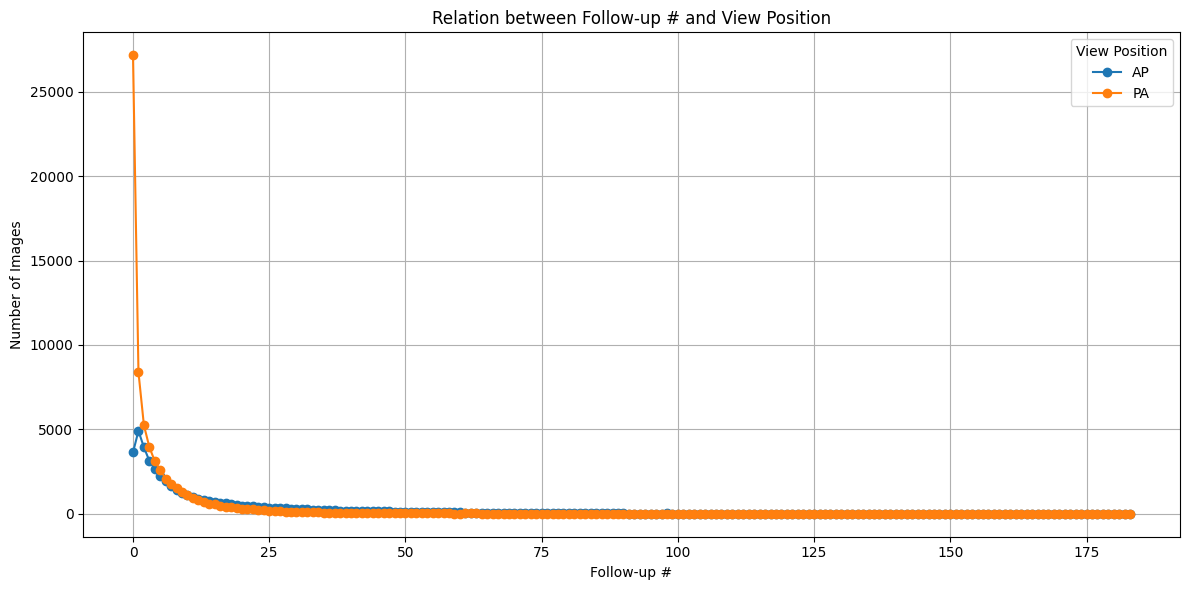

In [ ]:
# Plot the relationship between Follow-up # and View Position
plt.figure(figsize=(12, 6))
follow_up_view_position_summary.plot(kind='line', marker='o', figsize=(12, 6))

# Set chart title and labels
plt.title("Relation between Follow-up # and View Position")
plt.xlabel("Follow-up #")
plt.ylabel("Number of Images")
plt.legend(title="View Position")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Converting df to numeric df which is necessary for correlation calculations
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Follow-up #,Patient ID,Patient Age,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Nothing,Gender
0,0,1,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,58,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,58,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,80,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,3,74,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#dropping (Follow-up #), (Patient ID), (Patient Age), (Nothing), (Gender) columns
df_num.drop('Follow-up #', axis=1, inplace=True)
df_num.drop('Patient ID'	, axis=1, inplace=True)
df_num.drop('Patient Age', axis=1, inplace=True)
df_num.drop('Nothing', axis=1, inplace=True)
df_num.drop('Gender', axis=1, inplace=True)

In [ ]:
#Correlation Between Each Disease
df_num.corr()

,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
Cardiomegaly,1.000000,-0.007090,0.130094,-0.172067,0.001762,0.014189,-0.010682,-0.012123,0.015819,-0.022248,0.009121,0.002848,0.004837,0.028318,0.015360
Emphysema,-0.007090,1.000000,0.011198,-0.163617,-0.001466,0.000406,0.023213,-0.007062,0.032599,0.178175,0.026408,-0.004888,-0.000908,-0.009204,-0.000521
Effusion,0.130094,0.011198,1.000000,-0.396464,-0.003656,0.118136,0.070710,0.019114,0.172445,0.047571,0.072009,0.024322,-0.002776,0.062092,0.101130
No Finding,-0.172067,-0.163617,-0.396464,1.000000,-0.048640,-0.501556,-0.251814,-0.264181,-0.366126,-0.240593,-0.190537,-0.122787,-0.133433,-0.156386,-0.225058
Hernia,0.001762,-0.001466,-0.003656,-0.048640,1.000000,-0.003780,0.011927,-0.002422,0.010830,-0.001621,0.001330,0.000182,0.007478,-0.002326,-0.005413
Infiltration,0.014189,0.000406,0.118136,-0.501556,-0.003780,1.000000,0.014047,0.042749,0.093131,0.000576,0.020381,0.073020,0.008794,0.094208,0.045926
Mass,-0.010682,0.023213,0.070710,-0.251814,0.011927,0.014047,1.000000,0.101253,0.018953,0.029940,0.065388,-0.001005,0.009959,0.002910,0.074573
Nodule,-0.012123,-0.007062,0.019114,-0.264181,-0.002422,0.042749,0.101253,1.000000,-0.007967,0.007576,0.049649,-0.003719,0.022478,0.000261,0.031819
Atelectasis,0.015819,0.032599,0.172445,-0.366126,0.010830,0.093131,0.018953,-0.007967,1.000000,0.031422,0.025202,0.029911,0.011130,-0.003397,0.108943
Pneumothorax,-0.022248,0.178175,0.047571,-0.240593,-0.001621,0.000576,0.029940,0.007576,0.031422,1.000000,0.031661,-0.009984,0.000094,-0.022487,0.000485


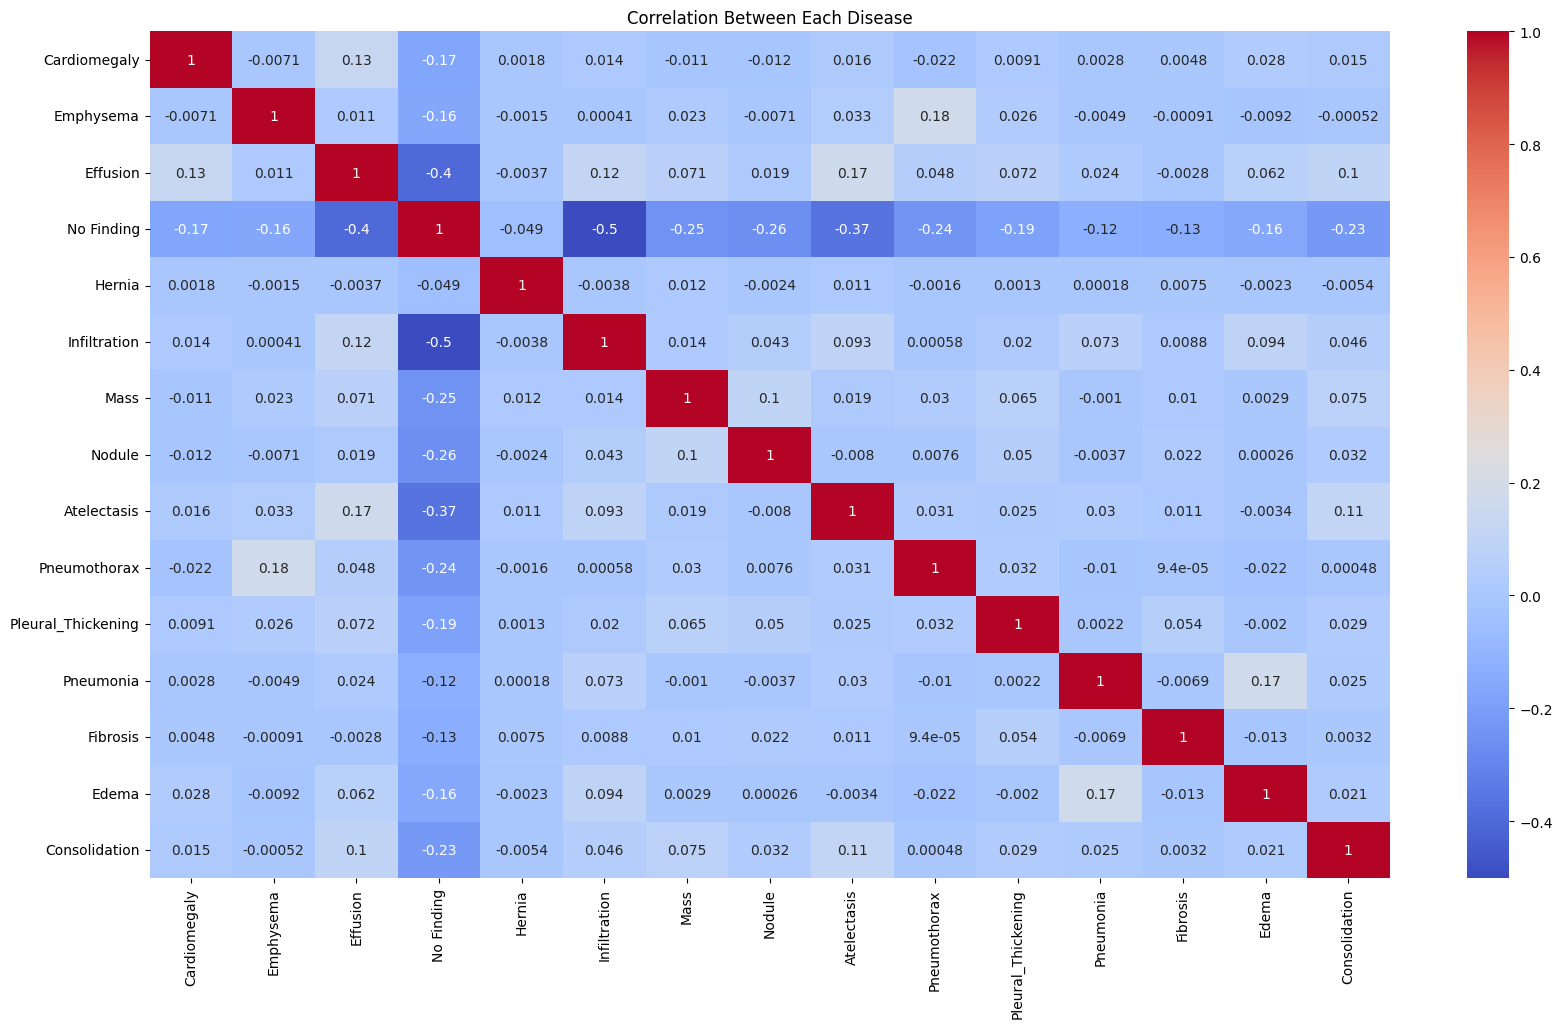

In [ ]:
# Heamap for the Correlation Between Each Disease
fig, axs = plt.subplots(1, 1, figsize=(20, 11))

sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', ax=axs)
axs.set_title("Correlation Between Each Disease")

plt.show()